In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
import pylab
import seaborn as sns

In [2]:
# read HR-Employee-Attrition file
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.tsv.txt", sep='\t')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#find how many unique values each row has



df.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [4]:
#because over18, standardhours, and employeecount have just 1 value, we can drop it 

df = df.drop(labels=['Over18','StandardHours','EmployeeCount'],axis=1)

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [5]:
# drop the columns not required and create new Data set called cdf

to_drop = ['BusinessTravel', 'DailyRate', 'DistanceFromHome',
           'JobLevel', 'MonthlyRate',
          'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating',
          'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
          'YearsInCurrentRole']
cdf = df.drop(to_drop, axis = 1)
cdf

,Age,Attrition,Department,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Sales,2,Life Sciences,1,2,Female,94,3,Sales Executive,4,Single,5993,Yes,8,1,6,0,5
1,49,No,Research & Development,1,Life Sciences,2,3,Male,61,2,Research Scientist,2,Married,5130,No,10,3,10,1,7
2,37,Yes,Research & Development,2,Other,4,4,Male,92,2,Laboratory Technician,3,Single,2090,Yes,7,3,0,0,0
3,33,No,Research & Development,4,Life Sciences,5,4,Female,56,3,Research Scientist,3,Married,2909,Yes,8,3,8,3,0
4,27,No,Research & Development,1,Medical,7,1,Male,40,3,Laboratory Technician,2,Married,3468,No,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,2,Medical,2061,3,Male,41,4,Laboratory Technician,4,Married,2571,No,17,3,5,0,3
1466,39,No,Research & Development,1,Medical,2062,4,Male,42,2,Healthcare Representative,1,Married,9991,No,9,3,7,1,7
1467,27,No,Research & Development,3,Life Sciences,2064,2,Male,87,4,Manufacturing Director,2,Married,6142,Yes,6,3,6,0,3
1468,49,No,Sales,3,Medical,2065,4,Male,63,2,Sales Executive,2,Married,5390,No,17,2,9,0,8


In [24]:
#adding columns of age bins to both df and cdf

age_bins = [0, 30, 40, 50, 60]

labels = ["<30", "31 - 40", "41 - 49", "51-60"]



cdf["Age_groups"] = pd.cut(cdf["Age"], bins = age_bins, labels = labels)
cdf

df["Age_groups"] = pd.cut(df["Age"], bins = age_bins, labels = labels)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_groups
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,0,8,0,1,6,4,0,5,41 - 49
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,1,10,3,3,10,7,1,7,41 - 49
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,0,7,3,3,0,0,0,0,31 - 40
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,0,8,3,3,8,7,3,0,31 - 40
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,1,6,3,3,2,2,2,2,<30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,1,17,3,3,5,2,0,3,31 - 40
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,1,1,9,5,3,7,7,1,7,31 - 40
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,2,1,6,0,3,6,2,0,3,<30
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,4,0,17,3,2,9,6,0,8,41 - 49


In [6]:
#we have to separate categorical and continuous variables by checking 
#the type of each column, also made a total list of all columns


def seperation(df):
    
    cat = []
    con = []
    df_col = []
    
    for i in df.columns:
        
        df_col.append(i),
        
        if df[i].dtype=='object':
            cat.append(i)
        else:
            con.append(i)
    return cat, con, df_col

In [7]:
#set each of the variables in seperation function to their respective lists
cat, con, df_col = seperation(df)


In [8]:
#finds averages of all columns grouped by attrition and jobrole and puts them in a dataframe (for convenience)

def job_line_means(num):
    
    num = con[num]
    
    job_means = df.groupby(["Attrition", 'JobRole']).mean()
    job_means = job_means.reset_index()
    job_means
    
    return job_means

In [9]:
#takes dataframe made in job_line_means function and puts it into a line graph (for convenience)

def job_linegraph(num):
    
    num = con[num]
    
    job_means = df.groupby(["Attrition", 'JobRole']).mean()
    job_means = job_means.reset_index()
    job_means

     
    #get to plotting
    job_list = job_means["JobRole"]
    job_list = job_list.drop_duplicates()
    job_list = job_list.tolist()
    
    job_no = job_means[job_means['Attrition'].str.contains('No')]
    job_no = job_no[num]
    job_no = job_no.tolist()
    
    
    
    job_yes = job_means[job_means['Attrition'].str.contains('Yes')]
    job_yes = job_yes[num]
    job_yes = job_yes.tolist()
    
    plt.plot(job_list, job_no, label = "kept job")
    plt.plot(job_list, job_yes, label = 'left job')
    
    plt.title("Rates based on Attrition by Job Role")
    plt.xlabel("Jobs")
    plt.ylabel(num)
    plt.xticks(rotation = 'vertical')
    
    plt.legend()   
    plt.show()

In [11]:
#checking null values of df with dropped columns 
cdf.isnull().sum()

Age                        0
Attrition                  0
Department                 0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
HourlyRate                 0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
OverTime                   0
TotalWorkingYears          0
WorkLifeBalance            0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [12]:
#checking types
cdf.dtypes

Age                         int64
Attrition                  object
Department                 object
Education                   int64
EducationField             object
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                     object
HourlyRate                  int64
JobInvolvement              int64
JobRole                    object
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
OverTime                   object
TotalWorkingYears           int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [13]:
cdf.describe()


,Age,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.912925,1024.865306,2.721769,65.891156,2.729932,2.728571,6502.931293,11.279592,2.761224,7.008163,2.187755,4.123129
std,9.135373,1.024165,602.024335,1.093082,20.329428,0.711561,1.102846,4707.956783,7.780782,0.706476,6.126525,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,491.250000,2.000000,48.000000,2.000000,2.000000,2911.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,3.000000,4919.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,4.000000,8379.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,4.000000,19999.000000,40.000000,4.000000,40.000000,15.000000,17.000000


In [14]:
# Total number of Employee Attrition
total_emp_att = cdf.Attrition.value_counts()
total_emp_att

No     1233
Yes     237
Name: Attrition, dtype: int64

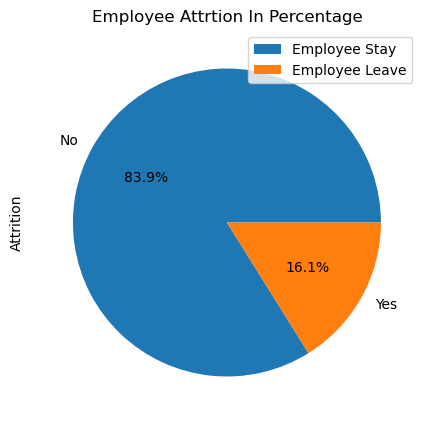

In [15]:
# Generate a pie plot showing the percentages of employee quit and employee stay
plot = total_emp_att.plot.pie(autopct="%1.1f%%", subplots=True, figsize=(5,5), labels=total_emp_att.index.values)
plt.title("Employee Attrtion In Percentage")
plt.legend(["Employee Stay", "Employee Leave"])
plt.show()


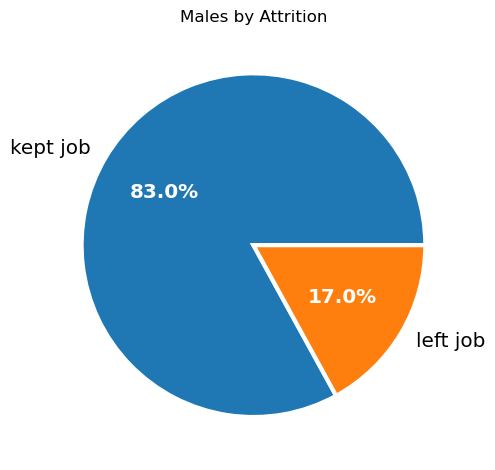

In [16]:
#We are making a pie chart that only includes Males

def pie_by_male():
    
    gender1 = df.groupby(['Gender', 'Attrition']).Attrition.count()
    gender_att = pd.DataFrame({"Count": gender1})
    gender_att.reset_index() 

    Male_attrition = gender_att.iloc[2:]
    Male_attrition = Male_attrition.reset_index()

    
    
    
    fig, ax = plt.subplots()
    patches, texts, pcts = ax.pie(Male_attrition['Count'], labels= ['kept job', 'left job'], autopct='%.1f%%',
          wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
    
    plt.setp(pcts, color='white', fontweight='bold')
    
    
    ax.set_title('Males by Attrition')
    plt.tight_layout()
    
pie_by_male()

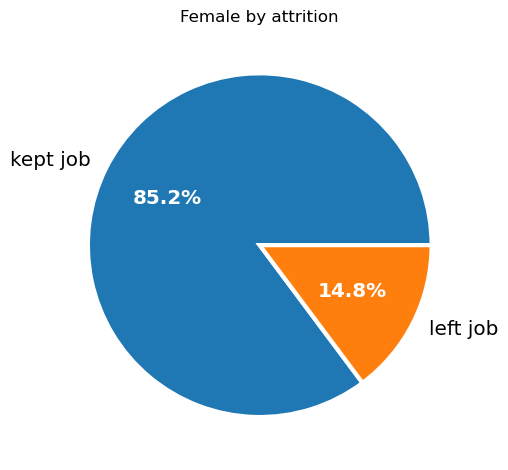

In [17]:
#We are making a pie chart that only includes Females

def pie_by_female():
    
    gender1 = df.groupby(['Gender', 'Attrition']).Attrition.count()
    gender_att = pd.DataFrame({"Count": gender1})
    gender_att.reset_index()
    
    Female_attrition = gender_att.iloc[:2]
    Female_attrition = Female_attrition.reset_index()
    
    
    
    fig, ax = plt.subplots()
    patches, texts, pcts = ax.pie(Female_attrition['Count'], 
                                  labels=['kept job', 'left job'],
                                  autopct='%.1f%%',
                                  wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
    ax.set_title('Female by attrition')
    
    plt.setp(pcts, color='white', fontweight='bold')
    plt.tight_layout()
    
pie_by_female()

In [18]:
#Makes means of all columns of the data separated by whether they attrited or not


att_means = cdf.groupby("Attrition" ).mean()
att_means = round(att_means, 2)
att_means

,Age,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,
No,37.56,2.93,1027.66,2.77,65.95,2.77,2.78,6832.74,11.86,2.78,7.37,2.23,4.37
Yes,33.61,2.84,1010.35,2.46,65.57,2.52,2.47,4787.09,8.24,2.66,5.13,1.95,2.85


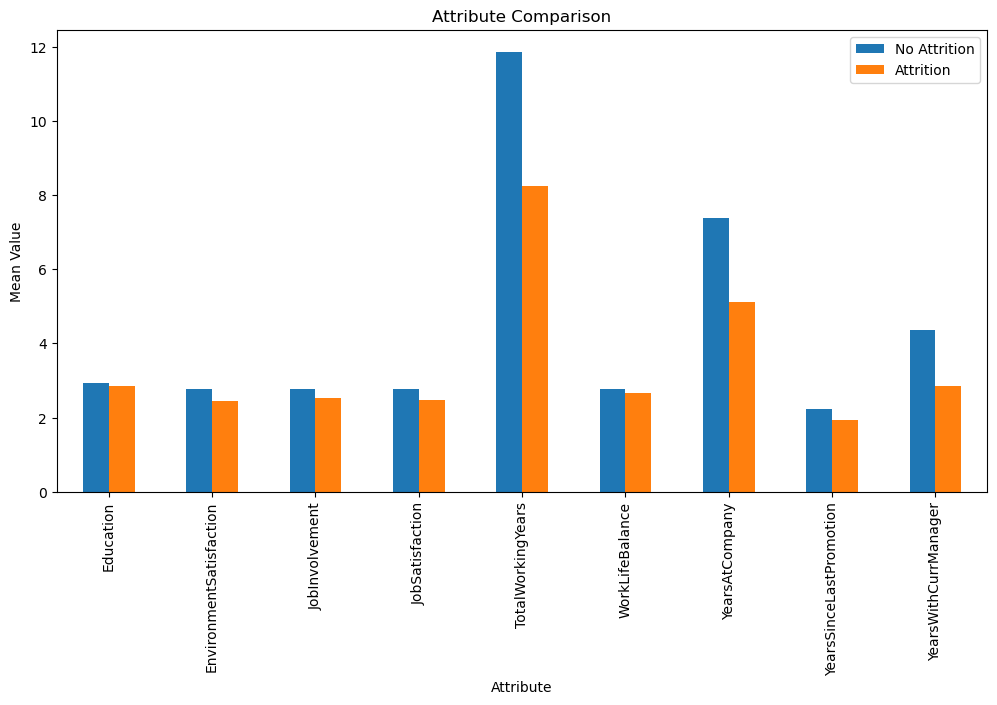

In [19]:
#making a dataframe out of columns that we see a noticeable difference in att_means and putting it on side by side bar graphs

at_df = pd.DataFrame({'Attribute': ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'TotalWorkingYears',
                                    'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
                   'No Attrition': [2.93, 2.77, 2.77, 2.78, 11.86, 2.78, 7.37, 2.23, 4.37],
                   'Attrition': [2.84, 2.46, 2.52, 2.47, 8.24, 2.66, 5.13, 1.95, 2.85]})

# Plot the data as a bar graph
at_df.set_index("Attribute", inplace=True)
at_df.plot(kind='bar', figsize=(12,6), stacked=False, width = 0.5)
 
plt.title("Attribute Comparison")
plt.xlabel("Attribute")
plt.ylabel("Mean Value")
plt.legend(loc='best')
plt.show()

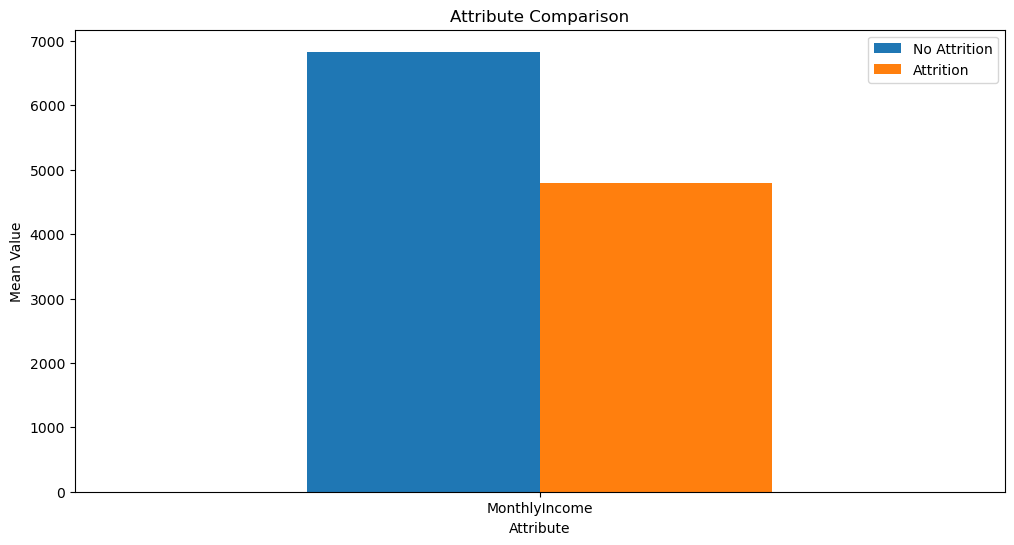

In [20]:

att_df = pd.DataFrame({"Attribute": ['MonthlyIncome'],
                   'No Attrition': [6832.74],
                   'Attrition': [4787.09]})

# Plot the data as a bar graph
att_df.set_index("Attribute", inplace=True)
att_df.plot(kind='bar', figsize=(12,6), stacked=False, width = 0.5)
 
plt.title("Attribute Comparison")
plt.xticks(rotation = "0")
plt.ylabel("Mean Value")
plt.legend(loc='best')
plt.show()

In [52]:
#the columns above looked significant so we applied t-test to them 

pop1 = df[df["Attrition"] == "Yes"]
pop2 = df[df["Attrition"] == "No"]



In [53]:
#for Education
st.ttest_ind(pop1.Education, pop2.Education)

Ttest_indResult(statistic=-1.2026255155085892, pvalue=0.22931520332230415)

In [54]:
#for 'EnvironmentSatisfaction'
st.ttest_ind(pop1.EnvironmentSatisfaction, pop2.EnvironmentSatisfaction)

Ttest_indResult(statistic=-3.9818600026818496, pvalue=7.17233854936886e-05)

In [55]:
#JobInvolvement
st.ttest_ind(pop1.JobInvolvement, pop2.JobInvolvement)

Ttest_indResult(statistic=-5.024140228583729, pvalue=5.677065356745289e-07)

In [56]:
#JobSatisfaction
st.ttest_ind(pop1.JobSatisfaction, pop2.JobSatisfaction)

Ttest_indResult(statistic=-3.9862267630568273, pvalue=7.04306674173115e-05)

In [61]:
#TotalWorkingYears
st.ttest_ind(pop1.TotalWorkingYears, pop2.TotalWorkingYears)

Ttest_indResult(statistic=-6.6522546135024445, pvalue=4.0618781112668525e-11)

In [60]:
#WorkLifeBalance
st.ttest_ind(pop1.WorkLifeBalance, pop2.WorkLifeBalance)


Ttest_indResult(statistic=-2.4548148934297767, pvalue=0.014211054989021308)

In [57]:
#YearsAtCompany
st.ttest_ind(pop1.YearsAtCompany, pop2.YearsAtCompany)

Ttest_indResult(statistic=-5.1963086670254235, pvalue=2.3188716103863033e-07)

In [58]:
#YearsSinceLastPromotion
st.ttest_ind(pop1.YearsSinceLastPromotion, pop2.YearsSinceLastPromotion)

Ttest_indResult(statistic=-1.2657876620135298, pvalue=0.2057899591624936)

In [59]:
#YearsWithCurrManager
st.ttest_ind(pop1.YearsWithCurrManager, pop2.YearsWithCurrManager)

Ttest_indResult(statistic=-6.059068531868998, pvalue=1.7369867845242207e-09)

In [62]:
#Monthly Income 

st.ttest_ind(pop1.MonthlyIncome, pop2.MonthlyIncome)

Ttest_indResult(statistic=-6.203935765608938, pvalue=7.14736398535381e-10)

In [31]:
#makes a stacked bar graph showing how many people kept and left the job based on categorical columns

def attrition_count_bargraph(num):
    
    try:  
        num = cat[num]
    
    
        Count =  df.groupby([num, "Attrition"]).Age.count()
        Count = pd.DataFrame({"Count": Count})
        Count = Count.reset_index()
    
    
        att_list = Count[num]
        att_list = att_list.drop_duplicates()
        att_list = att_list.tolist()
    



        att_no = Count[Count["Attrition"].str.contains('No')]
        att_no = att_no['Count']
        att_no = att_no.tolist()
    



        att_yes = Count[Count["Attrition"].str.contains('Yes')]
        att_yes = att_yes['Count']
        att_yes = att_yes.tolist()
    
    
    
        plt.bar(att_list, att_no, color='green')
        plt.bar(att_list, att_yes, bottom= att_no, color='red',)
        plt.xticks(rotation = 'vertical')

        labels = ["Kept job", "Left job"]
        plt.legend(labels)

        plt.show()
        
    except:
        print("You can't have Attrition twice")

In [63]:
cat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

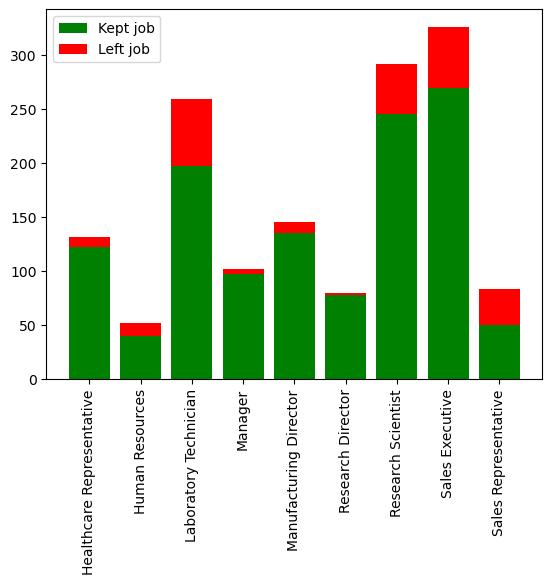

In [33]:
#shows how much of total that leave the job based on Job Role
attrition_count_bargraph(5)

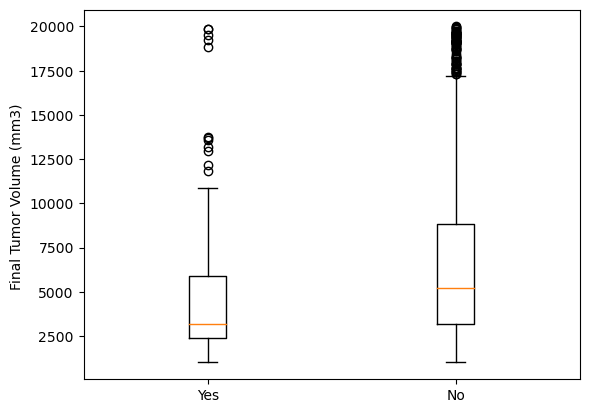

In [34]:
#boxplots for yes vs no for Monthly Income based on Jobs

job_status = ['Yes', 'No']

income = []

for i in job_status:
    monthlyincome = df.loc[cdf["Attrition"] == i, "MonthlyIncome"]
    
    income.append(monthlyincome)

#calculate quantiles

fig1, ax = plt.subplots()
ax.set_ylabel("Final Tumor Volume (mm3) ")

ax.boxplot(income, labels = job_status)
plt.show()
